In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("../knn/fraud_prediction.csv")
df.head()

,step,amount,oldbalanceorg,newbalanceorig,oldbalancedest,newbalancedest,isfraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,181.0,181.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0
1,1,181.0,181.0,0.0,21182.0,0.0,1,0.0,1.0,0.0,0.0,0.0
2,1,2806.0,2806.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0
3,1,2806.0,2806.0,0.0,26202.0,0.0,1,0.0,1.0,0.0,0.0,0.0
4,1,20128.0,20128.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0


In [3]:
# assigning Features and Target variables

X = df.drop('isfraud',axis =1).values
y = df['isfraud'].values

In [4]:
# create training and testing dataset

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state= 42,stratify= y)

In [9]:
# Create Logistic Regression

regressor =  LogisticRegression()
regressor.fit(X_train,y_train)

c:\Users\Veera\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
regressor_score  = regressor.score(X_test,y_test)
print(f'Score:{regressor_score*100:.2f}%')

Score:73.43%


This model has produced an accuracy of 73.43% on the test data. This means that the base
logistic regression model only performs slightly better than an algorithm that randomly
guesses the output

###                           Fine-tuning the hyperparameters

In [17]:
#Building the model with L1 penality
regressor_l1 = LogisticRegression(penalty='l1',solver='liblinear')

In [18]:
from sklearn.model_selection import GridSearchCV

#Using GridSearchCV to search for the best parameter
grid = GridSearchCV(regressor_l1, {'C':[0.0001, 0.001, 0.01, 0.1,10]})
grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 10]})

In [19]:
# Print out the best parameter
print("The most optimal inverse regularization strength is:",grid.best_params_)

The most optimal inverse regularization strength is: {'C': 10}


Use the best params to fit the data

In [22]:
regressor_param = LogisticRegression(penalty='l1', C=10,solver = 'liblinear')

In [23]:
regressor_param.fit(X_train,y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [24]:
param_Score = regressor_param.score(X_test,y_test)
print(f'L1_Score:{param_Score*100:.2f}%')

L1_Score:99.54%


Evaluating the model on the test data by using the following code, we obtain an accuracy
score of 99.54%! That's quite the improvement.

One way to check whether GridSearchCV is giving us accurate results is to plot the
accuracy scores along the y-axis for different values of the inverse regularization strengths
along the x-axis.

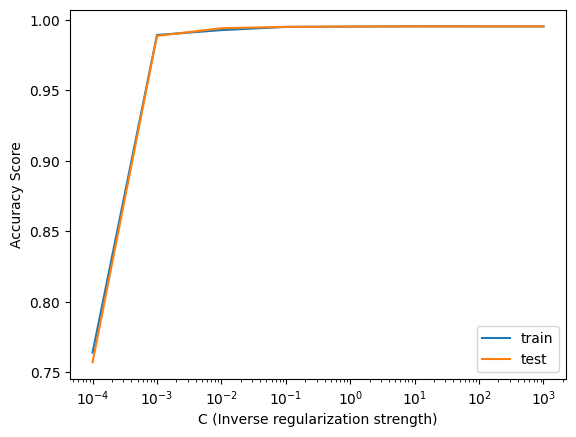

In [31]:
train_errors = []
test_errors = []
C_list = [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000]

# Evaluate the training and test classification errors for each value of C
for value in C_list:
    # Create LogisticRegression object and fit
    logistic_regression = LogisticRegression(C= value, penalty ='l1',solver ='liblinear')
    logistic_regression.fit(X_train, y_train)
    # Evaluate error rates and append to lists
    train_errors.append(logistic_regression.score(X_train, y_train) )
    test_errors.append(logistic_regression.score(X_test, y_test))
    
# Plot results
plt.semilogx(C_list, train_errors, C_list, test_errors)
plt.legend(("train", "test"))
plt.ylabel('Accuracy Score')
plt.xlabel('C (Inverse regularization strength)')
plt.show()

From the preceding plot, it is clear that an inverse regularization strength of 10 provides a
high value of accuracy for both the training and testing sets. Such plots are also used to
determine whether a particular value of the hyperparameter is overfitting the data by
giving us a high accuracy score on the training set, but low accuracy scores on the test set.
Conversely, they can also be used to check whether a model is undercutting the data by
giving us low values of accuracy on the training set itself.

### Scaling the data


Although the model has performed extremely well, scaling the data is still a useful step in
building machine learning models with logistic regression, as it standardizes your data
across the same range of values. In order to scale your data, we will use the same
StandardScaler() function

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [34]:
#Setting the pipeline

pipeline_order = [('scaler',StandardScaler()),
                  ('logistic_reg',LogisticRegression(C=10,penalty='l1',solver="liblinear"))
                  ]

pipeline = Pipeline(pipeline_order)

#Fitting the classfier to the scaled dataset
logistic_regression_scaled = pipeline.fit(X_train, y_train)

#Extracting the score
score_Scaler = logistic_regression_scaled.score(X_test, y_test)
print(f"Score of after Standard Scaler:{score_Scaler*100:.2f}%")

Score of after Standard Scaler:99.47%


If we want to implement the best regularisation use this method

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2'],
    'logistic__solver': ['liblinear', 'saga']  # 'liblinear' supports both 'l1' and 'l2'
}

# Define the pipeline order
pipeline_order = [
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(max_iter= 300))
]
# Create the pipeline
pipeline = Pipeline(pipeline_order)

# Instantiate GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Output the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print(f"Best cross-validation score:{grid_search.best_score_ *100:.2f}%")


c:\Users\Veera\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Veera\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Veera\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Veera\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Veera\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

Best parameters found:  {'logistic__C': 100, 'logistic__penalty': 'l1', 'logistic__solver': 'liblinear'}
Best cross-validation score:99.50%


#### Best paramters and best penality method

Best parameters found:  {'logistic__C': 100, 'logistic__penalty': 'l1', 'logistic__solver': 'liblinear'}

Best cross-validation score:99.50%